# スケール・フリーネットワークモデル
###  3つの代表的なスケール・フリーネットワークモデルを紹介します。

In [1]:
import collections
import itertools
import math
import pandas as pd
from scipy.special import comb
import networkx as nx
import numpy as np

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import plot_degree_distribution, get_maxdegree

/Users/koga/.pyenv/versions/3.8.9/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Barabasi-Albert Model


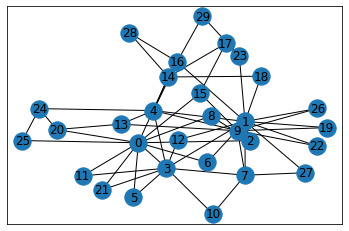

In [2]:
g = nx.barabasi_albert_graph(n=30, m=2)
nx.draw_networkx(g)

### 次数分布


In [3]:
def f(k, m):
    return 2 * m * k ** (-3)


In [4]:
G = nx.barabasi_albert_graph(n=5000, m=2)
max_deg = get_maxdegree(G)
lines = [f(k, 2) if k != 0 else 0 for k in range(0, max_deg+1)]

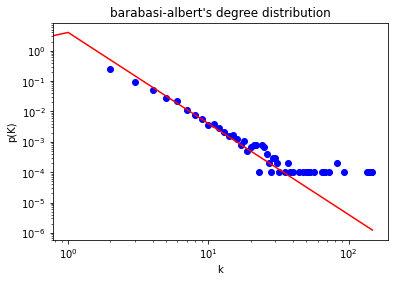

In [5]:
plot_degree_distribution(G, lines, title="barabasi-albert's degree distribution")




## Chung-Lu Model

In [34]:
def calc_weight(N, gamma, i_0):
    assert 0 <= gamma < 1, "gamma should be 0 <= gamma < 1"
    assert i_0 >= 1, "i_0 should be greater than 1"
    return [(i+1 + i_0 - 1) ** (gamma) for i in range(N)]



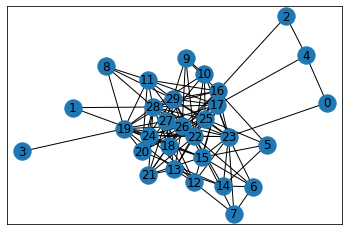

In [37]:
w = calc_weight(30, 0.8, 1)
G = nx.expected_degree_graph(w)
nx.draw_networkx(G)

### 次数分布

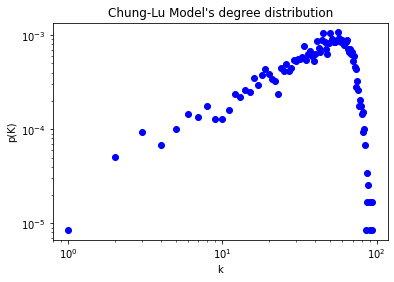

In [38]:
w = calc_weight(5000, 0.5, 2.5)
G = nx.expected_degree_graph(w)
max_deg = get_maxdegree(G)
lines = [f(k, 2) if k != 0 else 0 for k in range(0, max_deg+1)]
plot_degree_distribution(G, None, title="Chung-Lu Model's degree distribution", )